In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# label = "small"
# serial_time = 3.28598
# serial_energy = 331.873
# facesim_ff = pd.read_csv("facesim/small/benchmark-gcc-ff.out")
# facesim_pthreads = pd.read_csv("facesim/small/benchmark-gcc-pthreads.out")

# label = "medium"
# serial_time = 3.2774
# serial_energy = 339.44
# facesim_ff = pd.read_csv("facesim/medium/benchmark-gcc-ff.out")
# facesim_pthreads = pd.read_csv("facesim/medium/benchmark-gcc-pthreads.out")

# label = "large"
# serial_time = 3.38355
# serial_energy = 350.243
# facesim_ff = pd.read_csv("facesim/large/benchmark-gcc-ff.out")
# facesim_pthreads = pd.read_csv("facesim/large/benchmark-gcc-pthreads.out")

label = "native"
serial_time = 272.352
serial_energy = 27035.4
facesim_ff = pd.read_csv("facesim/native/benchmark-gcc-ff.out")
facesim_pthreads = pd.read_csv("facesim/native/benchmark-gcc-pthreads.out")

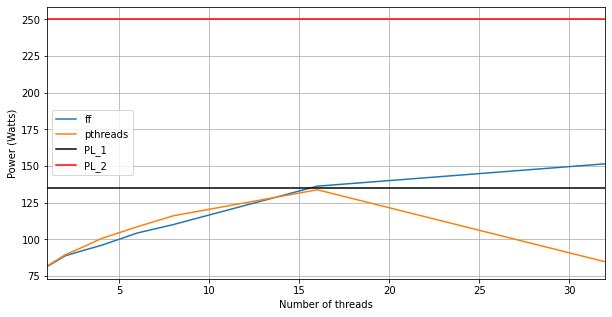

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(facesim_ff.Threads,facesim_ff.JoulesCpuAll/ facesim_ff.Time,label = "ff")
plt.plot(facesim_pthreads.Threads,facesim_pthreads.JoulesCpuAll/ facesim_pthreads.Time,label = "pthreads")
plt.axhline(y=135, color='black', linestyle='-', label="PL_1")
plt.xlim([1,32])
plt.axhline(y=250, color='r', linestyle='-', label="PL_2")
plt.xlabel("Number of threads")
plt.ylabel("Power (Watts)")
plt.grid()
plt.legend()
plt.savefig('facesim_'+label+'_power')
plt.show()

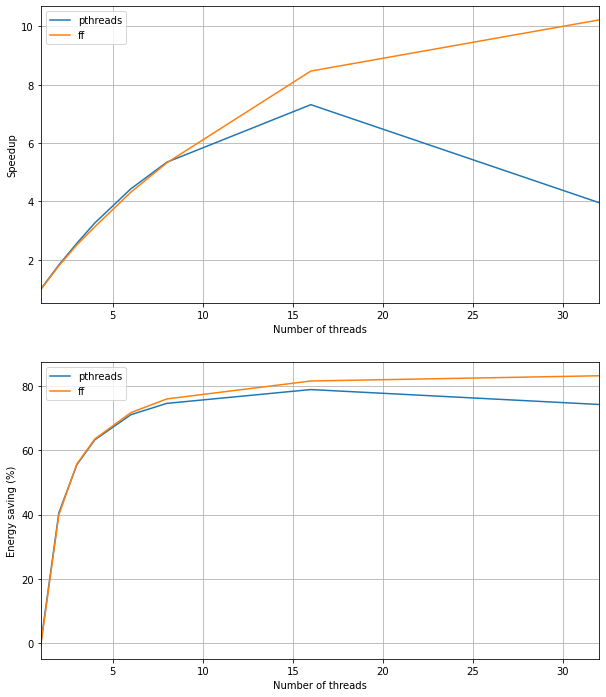

In [30]:
fig, ax = plt.subplots(2,figsize=(10, 12))

ax[0].plot(facesim_pthreads.Threads, serial_time / facesim_pthreads.Time,label = "pthreads")
ax[0].plot(facesim_ff.Threads, serial_time / facesim_ff.Time, label = "ff")
ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Speedup")
ax[0].set_xlim([1,32])
ax[0].grid()
ax[0].legend()

ax[1].plot(facesim_pthreads.Threads, (serial_energy - facesim_pthreads.PCM_energy) / serial_energy *100,label = "pthreads")
ax[1].plot(facesim_ff.Threads, (serial_energy - facesim_ff.PCM_energy) / serial_energy *100, label = "ff")
ax[1].set_xlabel("Number of threads")
ax[1].set_ylabel("Energy saving (%)")
ax[1].set_xlim([1,32])
ax[1].grid()
ax[1].legend()

fig.savefig('facesim_'+label+'_overall')

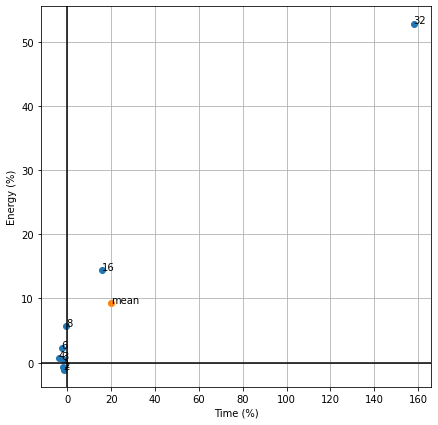

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))

ff_vs_pthread = (facesim_pthreads - facesim_ff) / facesim_ff * 100
ff_vs_pthread[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax.scatter(ff_vs_pthread.Time, ff_vs_pthread.PCM_energy)
ax.scatter(ff_vs_pthread.Time.mean(), ff_vs_pthread.PCM_energy.mean())
ax.annotate("mean",(ff_vs_pthread.Time.mean(), ff_vs_pthread.PCM_energy.mean()))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('Time (%)')
ax.set_ylabel('Energy (%)')
ax.grid()

for i in range(8):
    ax.annotate(facesim_ff.Threads[i], (ff_vs_pthread.Time[i], ff_vs_pthread.PCM_energy[i]))

fig.savefig('facesim_'+label+'_pthreads_vs_ff')